In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [10]:
import platform
import matplotlib.font_manager as fm

# 운영체제에 따라 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # Mac
    plt.rc('font', family='AppleGothic')
else:  # 리눅스 또는 기타
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 1. 데이터 로드 및 사과 데이터 필터링
data_path = "C:/Users/medici/Desktop/syrup/TRAIN_전국도매_2018-2021.csv"
domestic_data = pd.read_csv(data_path)

In [3]:
apple_data = domestic_data[domestic_data['품목명'] == '사과']

In [5]:
apple_data.head()

,시점,시장코드,시장명,품목코드,품목명,품종코드,품종명,총반입량(kg),총거래금액(원),평균가(원/kg),...,저가(20%) 평균가,중간가(원/kg),최저가(원/kg),최고가(원/kg),경매 건수,전순 평균가격(원) PreVious SOON,전달 평균가격(원) PreVious MMonth,전년 평균가격(원) PreVious YeaR,평년 평균가격(원) Common Year SOON,연도
13,201801상순,100000,*전국도매시장,601,사과,60145,로얄부사,287565.0,634601200,2206.809591,...,1320.895904,1987.356322,0.000000,4901.459854,239,23366.814482,20880.566279,21662.294413,34852.123851,2018
14,201801상순,100000,*전국도매시장,601,사과,60176,미야비,8280.0,20808300,2513.079710,...,2028.201058,2458.063689,550.000000,2936.274510,12,17240.282686,68000.000000,23316.348816,0.000000,2018
15,201801상순,100000,*전국도매시장,601,사과,60182,챔피온,4900.0,7649900,1561.204082,...,1160.142857,1659.897059,910.000000,2565.000000,14,31599.771398,21615.061668,25400.000000,0.000000,2018
16,201801상순,100000,*전국도매시장,601,사과,60172,로얄후지,1420.0,3941000,2775.352113,...,2775.352113,2144.060762,1282.105263,3006.016260,2,18216.103797,26223.045872,35971.724518,0.000000,2018
17,201801상순,100000,*전국도매시장,601,사과,60161,스타칼라,9810.0,19499500,1987.716616,...,1173.502304,1377.111111,100.000000,2817.045455,20,0.000000,0.000000,14833.000000,0.000000,2018


In [6]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29193 entries, 13 to 175992
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   시점                           29193 non-null  object 
 1   시장코드                         29193 non-null  int64  
 2   시장명                          29193 non-null  object 
 3   품목코드                         29193 non-null  int64  
 4   품목명                          29193 non-null  object 
 5   품종코드                         29193 non-null  int64  
 6   품종명                          29193 non-null  object 
 7   총반입량(kg)                     29193 non-null  float64
 8   총거래금액(원)                     29193 non-null  int64  
 9   평균가(원/kg)                    29193 non-null  float64
 10  고가(20%) 평균가                  29193 non-null  float64
 11  중가(60%) 평균가                  29193 non-null  float64
 12  저가(20%) 평균가                  29193 non-null  float64
 13  중간가(원/kg)          

In [4]:
# 2. 상위 10개 품종 추출
top_10_apple_breeds = (
    apple_data.groupby('품종명')['총반입량(kg)'].sum()
    .reset_index()
    .sort_values(by='총반입량(kg)', ascending=False)
    .head(10)
)

In [7]:
# 3. 상위 10개 품종 데이터 필터링
apple_data_top_10 = apple_data[apple_data['품종명'].isin(top_10_apple_breeds['품종명'])]

In [8]:
apple_data_top_10.head()

,시점,시장코드,시장명,품목코드,품목명,품종코드,품종명,총반입량(kg),총거래금액(원),평균가(원/kg),...,저가(20%) 평균가,중간가(원/kg),최저가(원/kg),최고가(원/kg),경매 건수,전순 평균가격(원) PreVious SOON,전달 평균가격(원) PreVious MMonth,전년 평균가격(원) PreVious YeaR,평년 평균가격(원) Common Year SOON,연도
13,201801상순,100000,*전국도매시장,601,사과,60145,로얄부사,287565.0,634601200,2206.809591,...,1320.895904,1987.356322,0.0,4901.459854,239,23366.814482,20880.566279,21662.294413,34852.123851,2018
23,201801상순,100000,*전국도매시장,601,사과,60103,후지,4421982.3,8056837500,1821.996777,...,940.431303,1567.500000,160.0,6750.000000,4983,20489.828672,19563.378717,21379.550547,29947.583478,2018
24,201801상순,100000,*전국도매시장,601,사과,60139,미시마,889136.0,1925181400,2165.227142,...,1136.041115,1891.693195,0.0,4954.545455,806,21176.267035,21199.438482,23159.822611,33297.739775,2018
25,201801상순,100000,*전국도매시장,601,사과,60140,미얀마,1949991.0,3513292890,1801.696977,...,928.147260,1773.068966,0.0,6950.000000,2326,27523.505116,26325.614342,33415.840358,40526.239978,2018
26,201801상순,100000,*전국도매시장,601,사과,60199,기타사과,536944.0,1232656124,2295.688422,...,1224.004594,2150.714286,0.0,35571.428571,271,22303.397082,19536.759719,22470.501596,30358.131614,2018


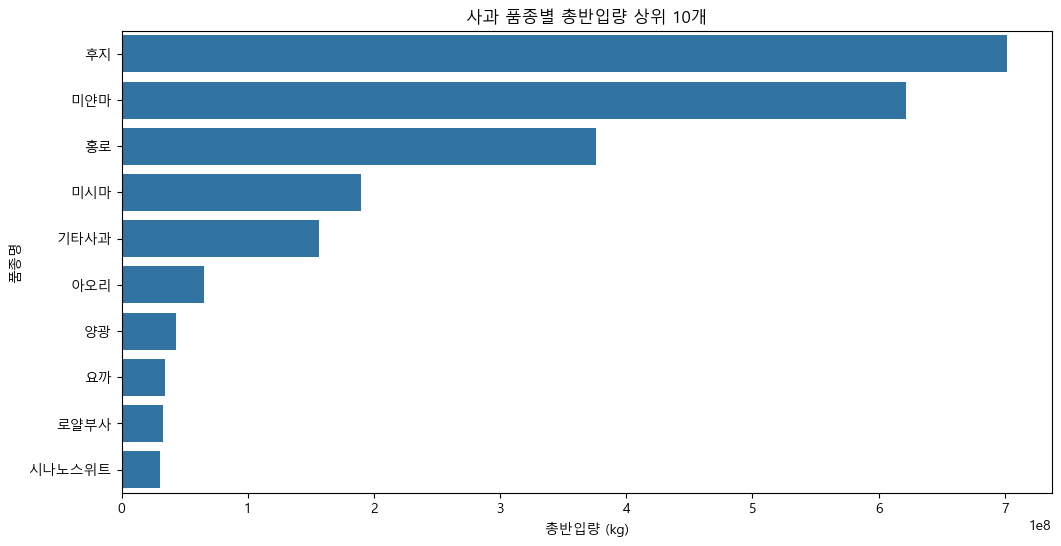

In [19]:
# 3. 상위 10개 품종의 총반입량 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='총반입량(kg)', y='품종명', data=top_10_apple_breeds)
plt.title('사과 품종별 총반입량 상위 10개')
plt.xlabel('총반입량 (kg)')
plt.ylabel('품종명')
plt.show()

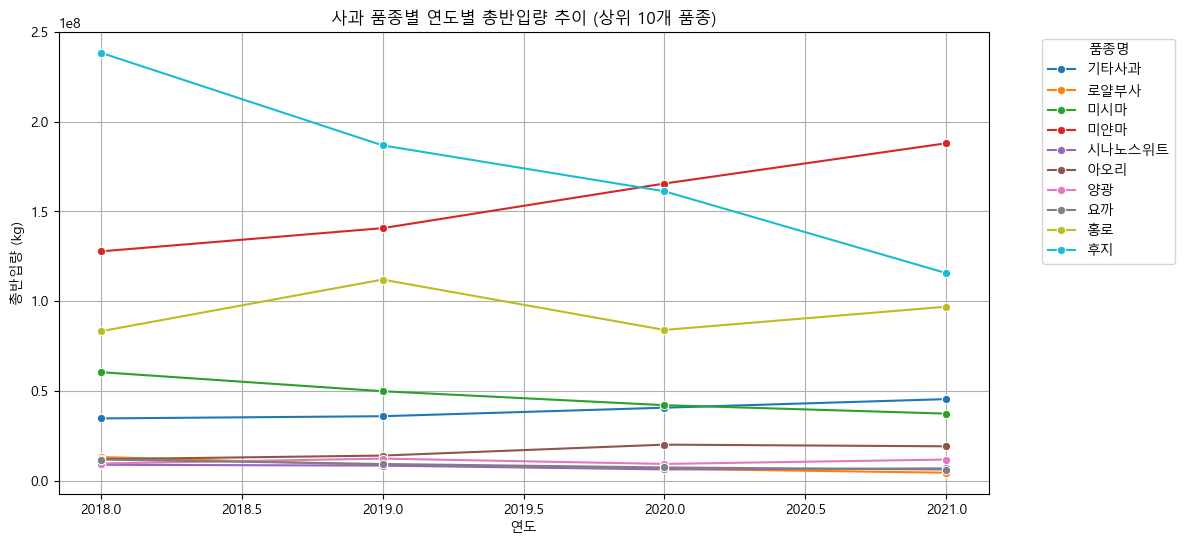

In [11]:
# 4. EDA: 품종별 연도별 거래량 시각화
apple_yearly = apple_data_top_10.groupby(['연도', '품종명'])['총반입량(kg)'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=apple_yearly, x='연도', y='총반입량(kg)', hue='품종명', marker='o')
plt.title('사과 품종별 연도별 총반입량 추이 (상위 10개 품종)')
plt.xlabel('연도')
plt.ylabel('총반입량 (kg)')
plt.legend(title='품종명', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [12]:
# 5. 모델 준비: 특성 생성 및 데이터 분할
apple_data_top_10['월'] = apple_data_top_10['시점'].str[:6]
monthly_data = apple_data_top_10.groupby(['월', '품종명'])['총반입량(kg)'].sum().reset_index()

C:\Users\medici\AppData\Local\Temp\ipykernel_14636\2609058969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data_top_10['월'] = apple_data_top_10['시점'].str[:6]


In [13]:
# 데이터 분할
train, test = train_test_split(monthly_data, test_size=0.2, shuffle=False)

In [25]:
# 3. 학습과 테스트 데이터를 더미 변수로 변환
X_train = pd.get_dummies(train[['월', '품종명']], drop_first=True)
y_train = train['총반입량(kg)']

X_test = pd.get_dummies(test[['월', '품종명']], drop_first=True)
y_test = test['총반입량(kg)']  # y_test 정의 추가

In [26]:
# 4. 학습 데이터와 테스트 데이터의 열 일치 처리
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [27]:
# 5. 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# 6. 예측 및 평가
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}')

RMSE: 10254084.76, MAE: 7073549.50


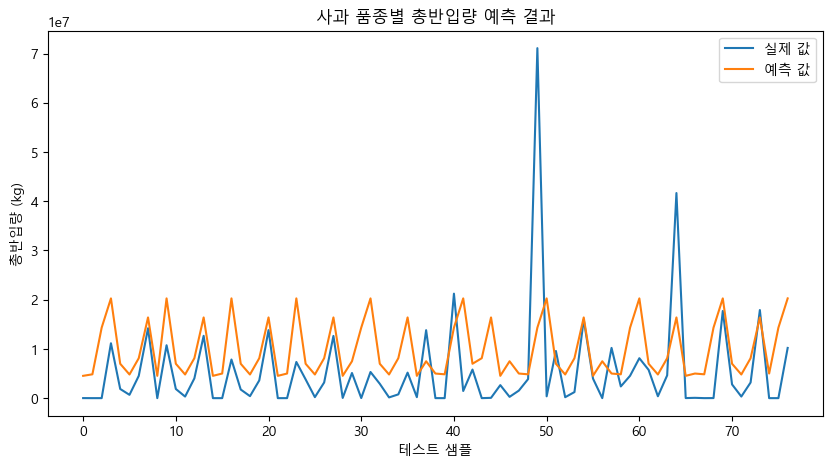

In [29]:
# 7. 예측 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='실제 값')
plt.plot(y_pred, label='예측 값')
plt.title('사과 품종별 총반입량 예측 결과')
plt.xlabel('테스트 샘플')
plt.ylabel('총반입량 (kg)')
plt.legend()
plt.show()